# **KMeans Clustering for Customer Data**

In [1]:
import numpy as np
import random

In [2]:
class KMeans: 
    def __init__(self,n_clusters:int, max_iter = 1000, random_state = 42):
        self.K = n_clusters
        self.max_iter = max_iter
        self.seed = random_state
        self.centers = []
        self.labels = []

    def distance (self,x,y):
        return np.sqrt(np.array((x-y)**2).sum())

    def set_label(self,X):
        self.labels = []
        for x in X:
            distance = []
            for center in self.centers:
                distance.append(self.distance(x,center))
            self.labels.append(distance.index(min(distance)))

    def fit (self,X):
        random.seed(self.seed)
        X = np.array(X)
        lenX = len(X)
        initial_indices = random.sample(range(lenX), self.K)
        self.centers = [X[idx] for idx in initial_indices]
        self.set_label(X)
        
        for iter_num in range(self.max_iter):
            new_centers = []
            for i in range(self.K):
                members = X[np.array(self.labels) == i]
                if len(members) :
                    new_centers.append(members.mean(axis=0))
                else: new_centers.append(X[random.randint(0,lenX-1)])
            if np.allclose(np.array(new_centers), np.array(self.centers)): break
            self.centers = new_centers
            self.set_label(X)
    
    def cluster_centers_(self):
        return np.array(self.centers)
    
    def labels_(self):
        return np.array(self.labels)
    
    def predict(self,X):
        labels = []
        for x in X:
            distance = []
            for center in self.centers:
                distance.append(self.distance(x,center))
            labels.append(distance.index(min(distance)))
        return np.array(labels)
    
    def get_inertias(self,X):
        X = np.array(X)
        inertia = 0
        for x in X:
            dists = [np.sum((x - c)**2) for c in self.centers]
            inertia += min(dists)
        return inertia


In [3]:
import pandas as pd

df = pd.read_csv('../data/Mall_Customers.csv',index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
X = df.drop(columns=['Gender','Spending Score (1-100)'])
y = df['Spending Score (1-100)']

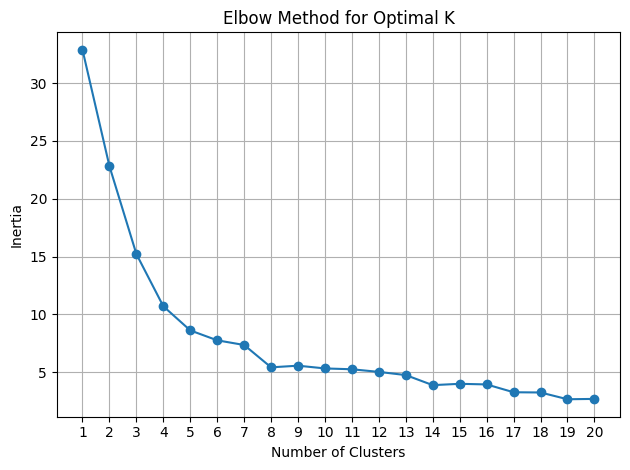

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_temp , y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



inertias = []

for n in range (20):
    kmeans_model = KMeans(n+1)
    kmeans_model.fit(X_train_scaled)
    inertias.append(kmeans_model.get_inertias(X_val_scaled))

plt.plot(range(1, 21), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:

kmeans_model = KMeans(5)
kmeans_model.fit(X_train_scaled)
y_pred = kmeans_model.predict(X_test_scaled)
centers = kmeans_model.cluster_centers_()

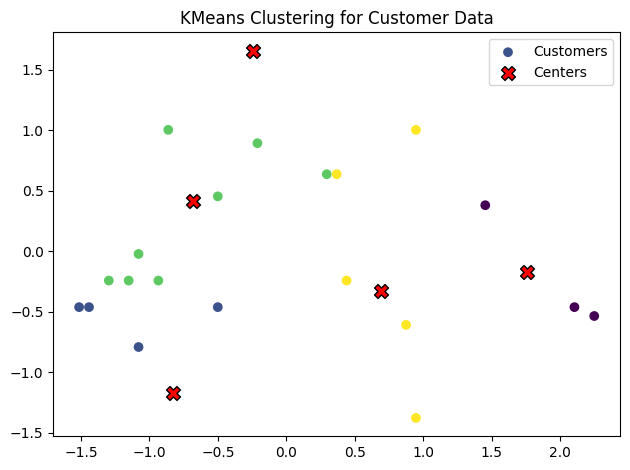

In [9]:
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_pred,cmap = 'viridis',label='Customers')
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker='X',edgecolor='k',label='Centers')

plt.legend()
plt.title('KMeans Clustering for Customer Data')
plt.tight_layout()
plt.show()